In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5 Generate Random World Cities
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [5]:
# 6.2.6 Get the City Weather Data
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
    


Beginning Data Retrieval     
-----------------------------


In [7]:
# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 1 | kimbe
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | marawi
Processing Record 4 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | toora-khem
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | billings
Processing Record 11 of Set 1 | sheridan
Processing Record 12 of Set 1 | kodinsk
Processing Record 13 of Set 1 | puerto del rosario
Processing Record 14 of Set 1 | oranjemund
Processing Record 15 of Set 1 | oktyabrskoye
Processing Record 16 of Set 1 | tracy
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | caravelas
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | scarborough
Processing Record 22 of Set 1 | port blair
Processing Record 23 of Set 

Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | tyup
Processing Record 40 of Set 4 | acandi
Processing Record 41 of Set 4 | khlevnoye
Processing Record 42 of Set 4 | anito
Processing Record 43 of Set 4 | diu
Processing Record 44 of Set 4 | ambilobe
Processing Record 45 of Set 4 | ahipara
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | warqla
City not found. Skipping...
Processing Record 48 of Set 4 | dolores
Processing Record 49 of Set 4 | tirumullaivasal
Processing Record 50 of Set 4 | margate
Processing Record 1 of Set 5 | porto novo
Processing Record 2 of Set 5 | hambantota
Processing Record 3 of Set 5 | na klang
Processing Record 4 of Set 5 | sheregesh
Processing Record 5 of Set 5 | koumac
Processing Record 6 of Set 5 | paita
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | porto empedocle
Processing Record 9 of Set 5 | sitka
Processing Record 10 of Set 5 | kirensk
Processing Reco

Processing Record 28 of Set 8 | valdivia
Processing Record 29 of Set 8 | hohhot
Processing Record 30 of Set 8 | gimli
Processing Record 31 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 32 of Set 8 | tranas
Processing Record 33 of Set 8 | broome
Processing Record 34 of Set 8 | miraflores
Processing Record 35 of Set 8 | bogorodskoye
Processing Record 36 of Set 8 | san quintin
Processing Record 37 of Set 8 | arman
Processing Record 38 of Set 8 | manubah
City not found. Skipping...
Processing Record 39 of Set 8 | dryden
Processing Record 40 of Set 8 | san carlos de bariloche
Processing Record 41 of Set 8 | sochi
Processing Record 42 of Set 8 | tairua
Processing Record 43 of Set 8 | flinders
Processing Record 44 of Set 8 | gidam
Processing Record 45 of Set 8 | zabaykalsk
Processing Record 46 of Set 8 | masalli
Processing Record 47 of Set 8 | hervey bay
Processing Record 48 of Set 8 | upernavik
Processing Record 49 of Set 8 | mago
Processing Record 50 of Set 8 | guerrero

Processing Record 16 of Set 12 | carballo
Processing Record 17 of Set 12 | marrakesh
Processing Record 18 of Set 12 | wuda
Processing Record 19 of Set 12 | khrebtovaya
Processing Record 20 of Set 12 | west plains
Processing Record 21 of Set 12 | plouzane
Processing Record 22 of Set 12 | kichera
Processing Record 23 of Set 12 | mbutuy
Processing Record 24 of Set 12 | gilbues
Processing Record 25 of Set 12 | kijang
Processing Record 26 of Set 12 | jishou
Processing Record 27 of Set 12 | marivan
Processing Record 28 of Set 12 | nhulunbuy
Processing Record 29 of Set 12 | adwa
Processing Record 30 of Set 12 | rio bravo
Processing Record 31 of Set 12 | sao filipe
Processing Record 32 of Set 12 | prince george
Processing Record 33 of Set 12 | taraza
Processing Record 34 of Set 12 | shetpe
Processing Record 35 of Set 12 | liberal
Processing Record 36 of Set 12 | strezhevoy
Processing Record 37 of Set 12 | naantali
Processing Record 38 of Set 12 | maraba
Processing Record 39 of Set 12 | price
P

In [8]:
len(city_data)

590

In [9]:
# 6.2.7 Create a DataFrame of City Weather Data
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kimbe,-5.5502,150.1429,79.63,89,100,4.09,PG,2021-04-07 03:31:03
1,Nanortalik,60.1432,-45.2371,35.04,97,100,15.77,GL,2021-04-07 03:29:16
2,Marawi,7.9986,124.2928,84.00,77,100,5.99,PH,2021-04-07 03:31:04
3,East London,-33.0153,27.9116,62.60,88,0,5.75,ZA,2021-04-07 03:29:34
4,Toora-Khem,52.4675,96.1100,44.28,61,53,2.35,RU,2021-04-07 03:31:04
5,Fortuna,40.5982,-124.1573,48.99,87,90,5.75,US,2021-04-07 03:31:05
6,Mar Del Plata,-38.0023,-57.5575,70.00,94,40,8.05,AR,2021-04-07 03:30:38
7,Hilo,19.7297,-155.0900,69.80,83,90,8.05,US,2021-04-07 03:26:42
8,Billings,45.7833,-108.5007,39.20,81,1,5.75,US,2021-04-07 03:30:06
9,Sheridan,44.8333,-106.9173,36.00,87,90,2.19,US,2021-04-07 03:31:06


In [10]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kimbe,PG,2021-04-07 03:31:03,-5.5502,150.1429,79.63,89,100,4.09
1,Nanortalik,GL,2021-04-07 03:29:16,60.1432,-45.2371,35.04,97,100,15.77
2,Marawi,PH,2021-04-07 03:31:04,7.9986,124.2928,84.00,77,100,5.99
3,East London,ZA,2021-04-07 03:29:34,-33.0153,27.9116,62.60,88,0,5.75
4,Toora-Khem,RU,2021-04-07 03:31:04,52.4675,96.1100,44.28,61,53,2.35
5,Fortuna,US,2021-04-07 03:31:05,40.5982,-124.1573,48.99,87,90,5.75
6,Mar Del Plata,AR,2021-04-07 03:30:38,-38.0023,-57.5575,70.00,94,40,8.05
7,Hilo,US,2021-04-07 03:26:42,19.7297,-155.0900,69.80,83,90,8.05
8,Billings,US,2021-04-07 03:30:06,45.7833,-108.5007,39.20,81,1,5.75
9,Sheridan,US,2021-04-07 03:31:06,44.8333,-106.9173,36.00,87,90,2.19


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# 6.3.1 Plot Latitude vs. Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

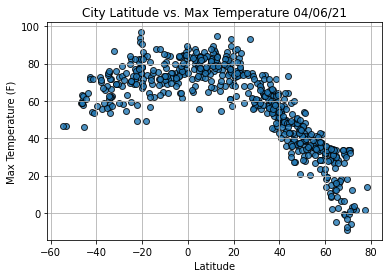

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

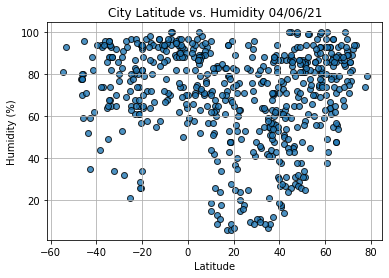

In [14]:
# 6.3.2 Plot Latitude vs. Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

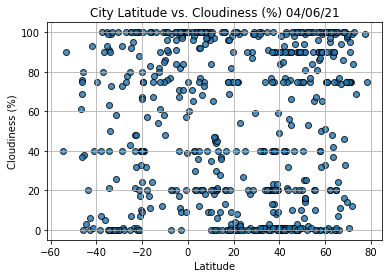

In [15]:
# 6.3.3 Plot Latitude vs. Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

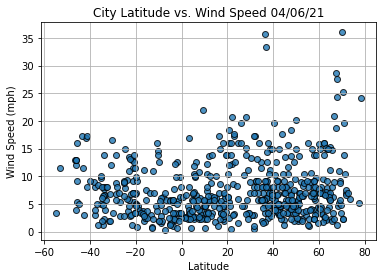

In [16]:
# 6.3.4 Plot Latitude vs. Wind Speed
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

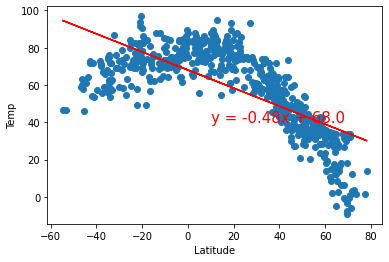

In [17]:
# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show() 

In [19]:
index13 = city_data_df.loc[13]
index13

City                 Oktyabrskoye
Country                        RU
Date          2021-04-07 03:31:07
Lat                       43.0645
Lng                       44.7417
Max Temp                     35.6
Humidity                       87
Cloudiness                     40
Wind Speed                   4.47
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nanortalik,GL,2021-04-07 03:29:16,60.1432,-45.2371,35.04,97,100,15.77
2,Marawi,PH,2021-04-07 03:31:04,7.9986,124.2928,84.00,77,100,5.99
4,Toora-Khem,RU,2021-04-07 03:31:04,52.4675,96.1100,44.28,61,53,2.35
5,Fortuna,US,2021-04-07 03:31:05,40.5982,-124.1573,48.99,87,90,5.75
7,Hilo,US,2021-04-07 03:26:42,19.7297,-155.0900,69.80,83,90,8.05


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

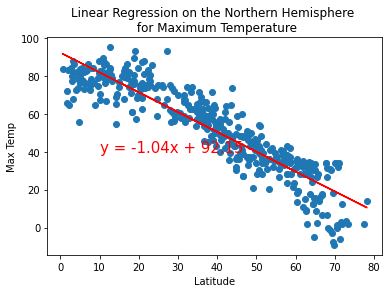

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

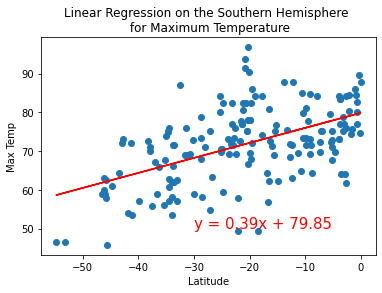

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,50))

In [24]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(r_value)

0.5310457676293355


In [25]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(r_value)

-0.9125654785494289


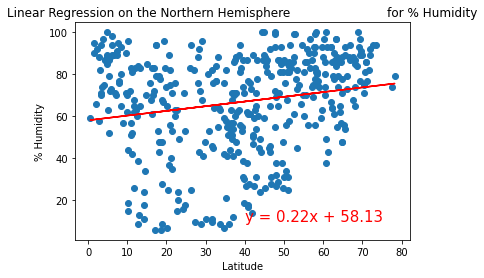

In [26]:
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

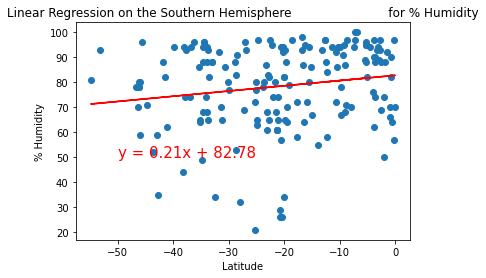

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,50))

In [28]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
print(r_value)

0.16651235945256337


In [29]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
print(r_value)

0.19009057965490347


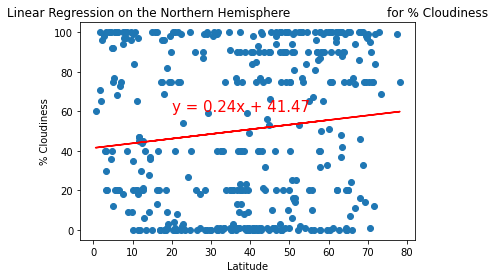

In [30]:
# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,60))

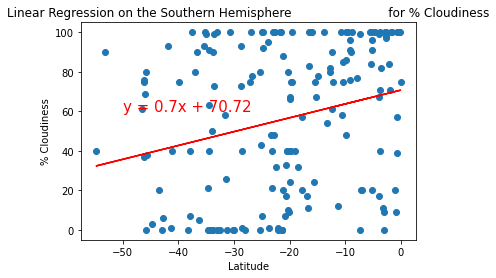

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

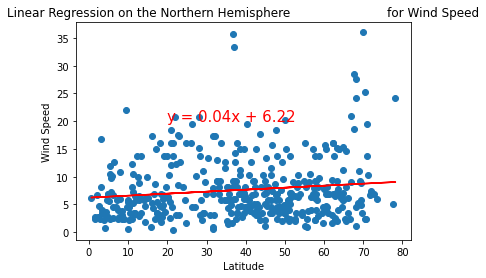

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,20))

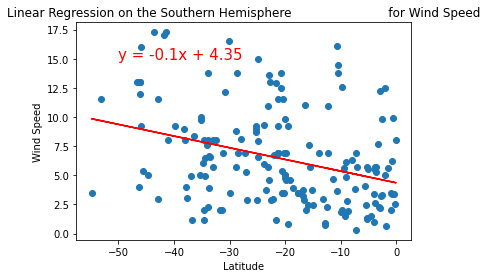

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))

In [34]:
# 6.5.1 Set Up Google Maps and Places API